In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
total_df = pd.read_pickle('./Countrywise_DGCA_2017.pkl')

In [3]:
distance_df = pd.read_pickle('./country_distance_data.pkl')

In [4]:
for i in range(len(distance_df)):
    if distance_df.country_name.iloc[i] == 'MYANMAR':
        distance_df.country_name.iloc[i] = 'BURMA'
    if distance_df.country_name.iloc[i] == 'SOUTH KOREA':
        distance_df.country_name.iloc[i] = 'KOREA'
    if distance_df.country_name.iloc[i] == 'REUNION (FRENCH)':
        distance_df.country_name.iloc[i] = 'REUNION'
    if distance_df.country_name.iloc[i] == 'UAE':
        distance_df.country_name.iloc[i] = 'UNITED ARAB EMIRATES'
    if distance_df.country_name.iloc[i] == 'USA':
        distance_df.country_name.iloc[i] = 'UNITED STATES'
    if distance_df.country_name.iloc[i] == 'UK':
        distance_df.country_name.iloc[i] = 'UNITED KINGDOM'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
distance_df['Present'] = False

In [6]:
for i in range(len(distance_df)):
    for j in range(len(total_df)):
        if distance_df.country_name[i] == total_df.country_name[j]:
            distance_df.Present.iloc[i] = True

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
distance_df = distance_df.reindex()

In [8]:
total_df['distance_in_km'] = [distance_df[distance_df['Present'] == True].distance_kms[i] 
                              for i in (distance_df[distance_df['Present'] == True].index)]
total_df['time_in_minutes'] = [distance_df[distance_df['Present'] == True].time_in_min[i] 
                               for i in (distance_df[distance_df['Present'] == True].index)]

In [9]:
total_df.to_pickle('./new_total_df.pkl')
total_df.to_csv('./new_total_df.csv')

In [10]:
distance_average = np.average(total_df.distance_in_km)
print(distance_average)

4303.747540983606


In [11]:
time_average = np.average(total_df.time_in_minutes)
print(time_average)

334.2295081967213


In [12]:
country_below_avg_distance = total_df[total_df.distance_in_km <= distance_average]

In [13]:
country_above_avg_distance = total_df[total_df.distance_in_km > distance_average]

In [14]:
CAAD_ffI_sorted = country_above_avg_distance.sort_values(by = ['freight_from_India', 'freight_to_India'], 
                                                         ascending = False)
CBAD_ffI_sorted = country_below_avg_distance.sort_values(by = ['freight_from_India', 'freight_to_India'], 
                                                         ascending = False)

CAAD_ffI_sorted.set_index(['country_name'], inplace = True)
CBAD_ffI_sorted.set_index(['country_name'], inplace = True)

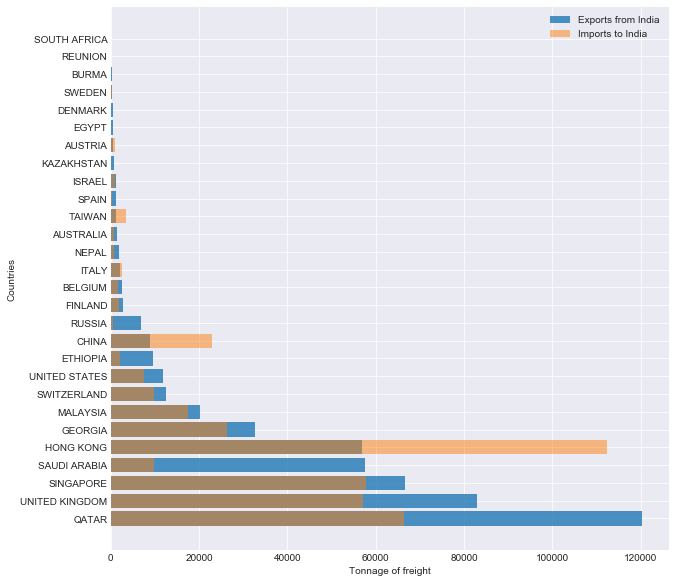

In [28]:
plt.figure(figsize =(10, 10))
plt.barh(y = CAAD_ffI_sorted.index, width = CAAD_ffI_sorted.freight_from_India, 
         alpha = 0.8, label = 'Exports from India')
plt.barh(y = CAAD_ffI_sorted.index, width = CAAD_ffI_sorted.freight_to_India, 
         alpha = 0.5, label = 'Imports to India')
plt.xlabel('Tonnage of freight')
plt.ylabel('Countries')
plt.legend()
plt.show()

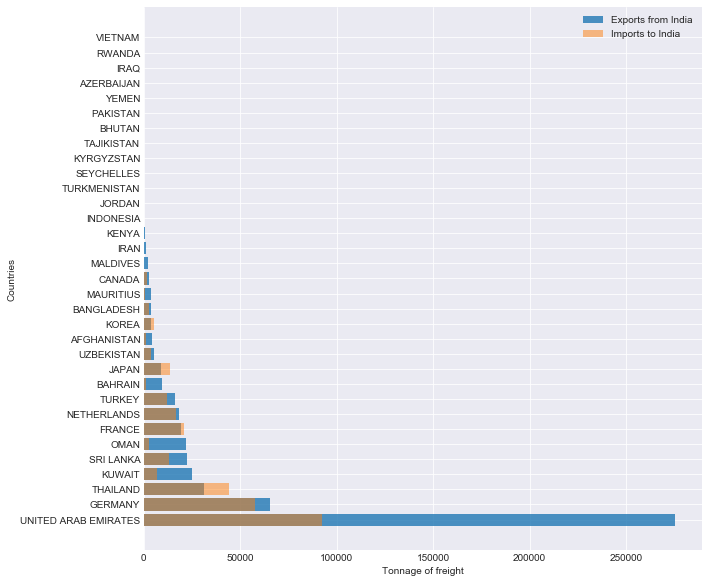

In [17]:
plt.figure(figsize =(10, 10))
plt.barh(y = CBAD_ffI_sorted.index, width = CBAD_ffI_sorted.freight_from_India,
         alpha = 0.8, label = 'Exports from India')
plt.barh(y = CBAD_ffI_sorted.index, width = CBAD_ffI_sorted.freight_to_India, 
         alpha = 0.5, label = 'Imports to India')
plt.xlabel('Tonnage of freight')
plt.ylabel('Countries')
plt.legend()
plt.show()

In [33]:
print(sum([total_df.freight_from_India.iloc[i] > total_df.freight_to_India.iloc[i] 
           for i in range(len(total_df.index))]))
print(sum([total_df.freight_from_India.iloc[i] < total_df.freight_to_India.iloc[i] 
           for i in range(len(total_df.index))]))
print(sum([total_df.freight_from_India.iloc[i] == total_df.freight_to_India.iloc[i] 
           for i in range(len(total_df.index))]))

46
10
5


In [18]:
import_countries = total_df[total_df.freight_from_India < total_df.freight_to_India]
import_countries.set_index(['country_name'], inplace = True)
import_countries

,pass_to_India,pass_from_India,freight_to_India,freight_from_India,distance_in_km,time_in_minutes
country_name,,,,,,
AUSTRIA,28164,27000,993.0,570.4,5587.2,432
CHINA,323402,326627,22911.8,8895.4,5875.4,454
FRANCE,410149,411269,20606.1,19169.7,3286.2,254
HONG KONG,706158,733870,112462.7,56916.1,4961.3,384
ITALY,73271,69985,2442.6,1969.2,5837.2,451
JAPAN,180048,196786,13686.7,9024.0,3995.2,309
KOREA,133773,135749,5297.6,3721.8,1592.8,132
SWEDEN,15353,18159,304.0,200.1,5585.3,432
TAIWAN,26715,28695,3439.9,1179.4,4380.9,339


In [19]:
export_countries = total_df[total_df.freight_from_India > total_df.freight_to_India]
export_countries.set_index(['country_name'], inplace = True)
export_countries

,pass_to_India,pass_from_India,freight_to_India,freight_from_India,distance_in_km,time_in_minutes
country_name,,,,,,
AFGHANISTAN,152416,145989,891.100,4258.300,1008.1,90
AUSTRALIA,72238,79144,692.300,1505.000,10331.7,799
BAHRAIN,537957,534302,998.100,9672.000,2652.5,205
BANGLADESH,477465,503242,2900.800,3607.700,1420.1,118
BELGIUM,39258,39103,1671.300,2595.400,6439.8,498
BHUTAN,53241,53081,3.600,87.200,1211.1,108
BURMA,30378,30138,3.100,186.500,11369.0,880
CANADA,167779,176956,1619.200,2924.800,3780.8,292
DENMARK,11814,8420,139.100,414.700,4436.6,343


In [20]:
zero_ei_countries = total_df[total_df.freight_from_India == 0.0]
zero_ei_countries.set_index(['country_name'], inplace = True)
zero_ei_countries

,pass_to_India,pass_from_India,freight_to_India,freight_from_India,distance_in_km,time_in_minutes
country_name,,,,,,
AZERBAIJAN,8414,8600,0.0,0.0,2840.9,219
IRAQ,20358,20177,0.0,0.0,4036.9,312
RWANDA,13507,13890,0.0,0.0,3080.8,238
SOUTH AFRICA,0,0,0.0,0.0,4709.3,364
VIETNAM,0,0,0.0,0.0,2974.4,230


In [21]:
no_txn_countries = total_df[total_df.pass_from_India == 0]
no_txn_countries.set_index(['country_name'], inplace = True)
no_txn_countries

,pass_to_India,pass_from_India,freight_to_India,freight_from_India,distance_in_km,time_in_minutes
country_name,,,,,,
SOUTH AFRICA,0,0,0.0,0.0,4709.3,364
VIETNAM,0,0,0.0,0.0,2974.4,230


In [27]:
print(total_df.freight_from_India.mean())
print(total_df.freight_from_India.std())
print(total_df.freight_from_India.var())

17171.418655737707
40921.7965085927
1674593429.4906697 40921.7965085927
